In [31]:
import os

import warnings

warnings.filterwarnings('ignore')

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [2]:
os.listdir('./data')

['employement_rate_aged_15_64.csv',
 'preprocessed_dataset.csv',
 'cluster_data.csv',
 'housing_units_filled.csv',
 'consumer_sentiment_filled.csv',
 'ppi_building_filled.csv',
 'Mortgage_rate_filled.csv',
 'target_filled.csv',
 'GDP.csv',
 'Pop_Growth_USA.csv',
 'Housing_units.csv',
 'unemployement_rate.csv',
 'ppi_trans_filled.csv',
 'new_owned_housing_units_filled.csv',
 'PPI_Transport_warehouse.csv',
 'working_age_pop_filled.csv',
 'consumer_sentiment.csv',
 'unemp_rate_filled.csv',
 'pop_growth_filled.csv',
 'gdp_data_filled.csv',
 'CSUSHPISA.csv',
 'Mortgage_rate.csv',
 'Unemp_rate.csv',
 'New_privately_owned_housing_units.csv',
 'Working_age_population.csv',
 'PPI_Building.csv']

### Using K Means Clustering , I am trying to find if there are any underlying patterns in the data i.e if specifc combination of values point towards a recurring value in the target variable. Another advantage of clustering is it makes visualizations more insightful by identifying areas with similar housing price trends and understand which factors are contributing to those trends within each cluster.

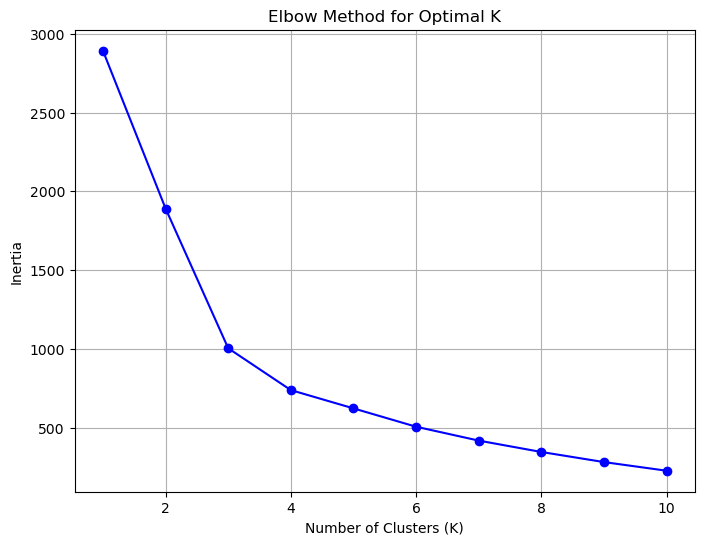

In [32]:
data_for_clustering = df2.select_dtypes(include=['float64'])


scaler = StandardScaler()
data_for_clustering = scaler.fit_transform(df2)


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(data_for_clustering)


df2['cluster_labels'] = cluster_labels

In [7]:
df = pd.read_csv('./data/cluster_data.csv')

df1 = df.copy(deep = True)

del df1['Unnamed: 0']

In [9]:
merged_df = df1

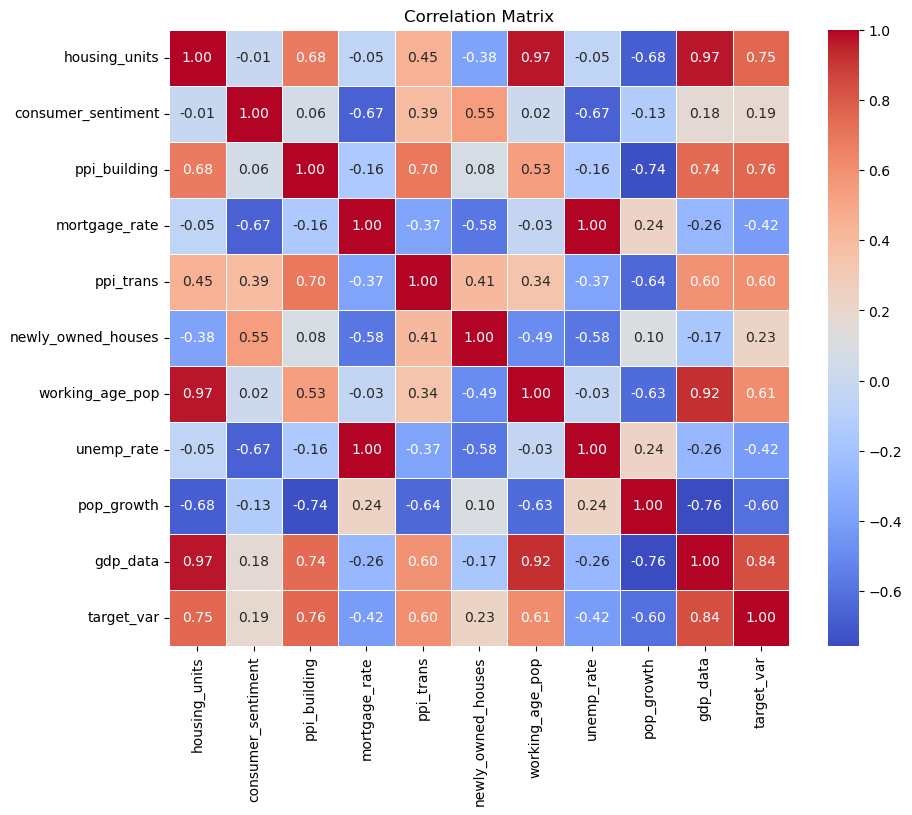

In [11]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(merged_df.iloc[: , merged_df.columns!='cluster_labels'].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

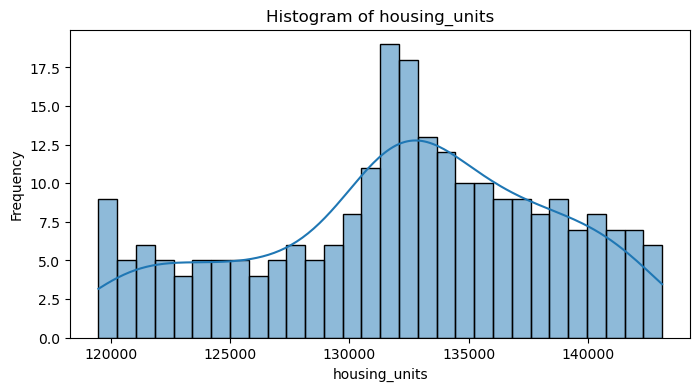

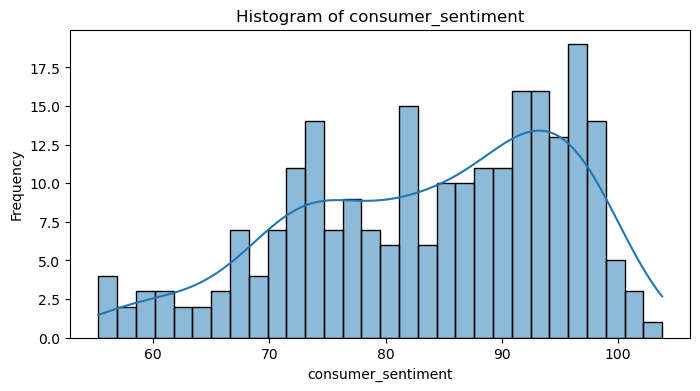

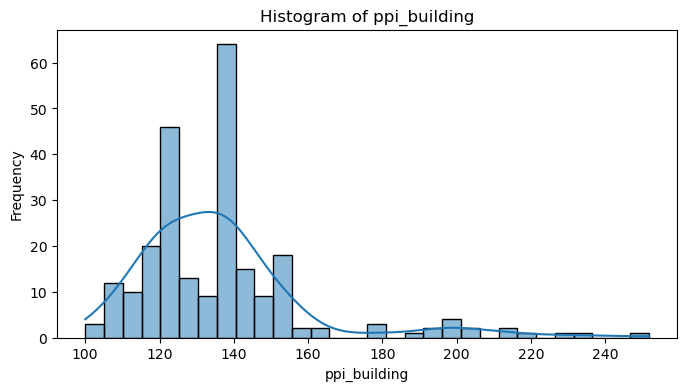

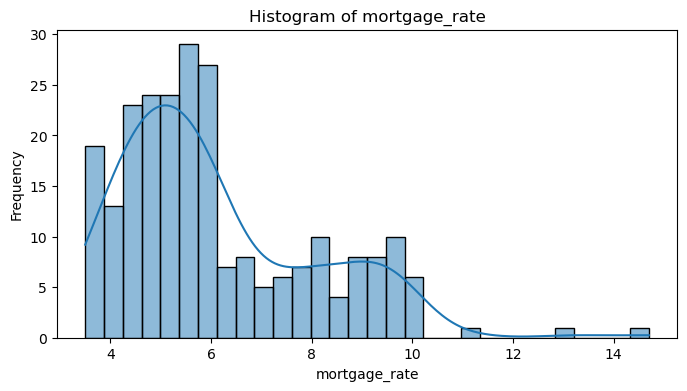

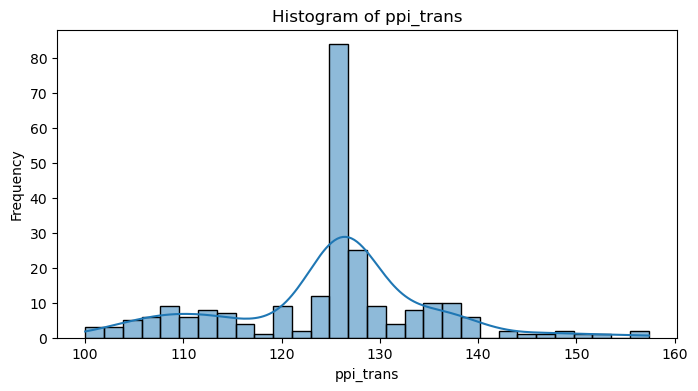

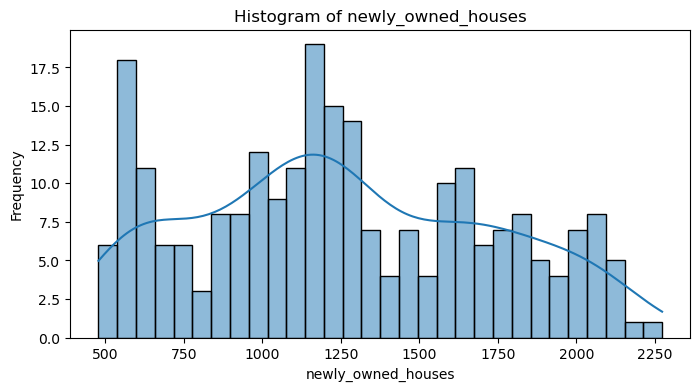

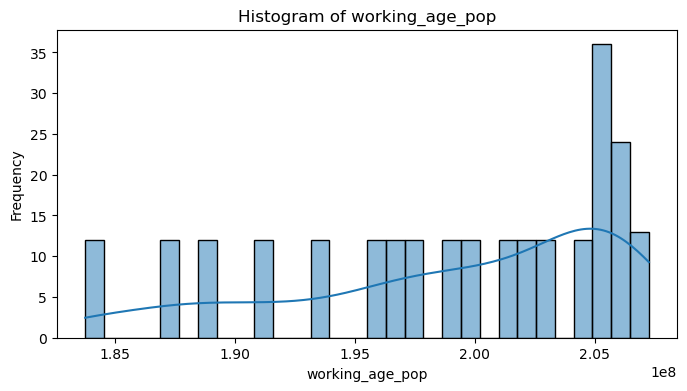

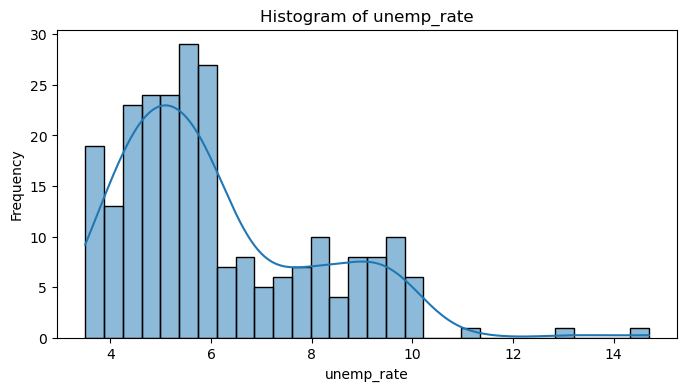

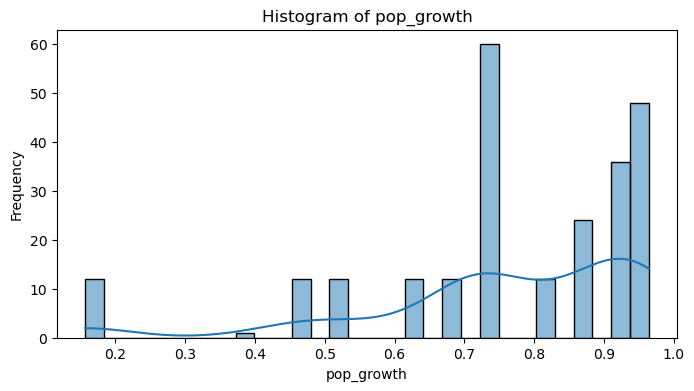

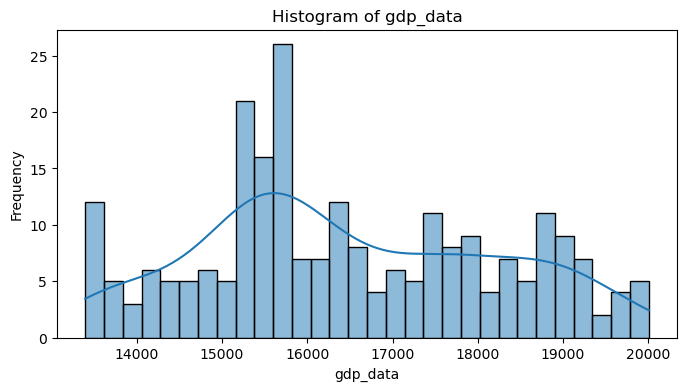

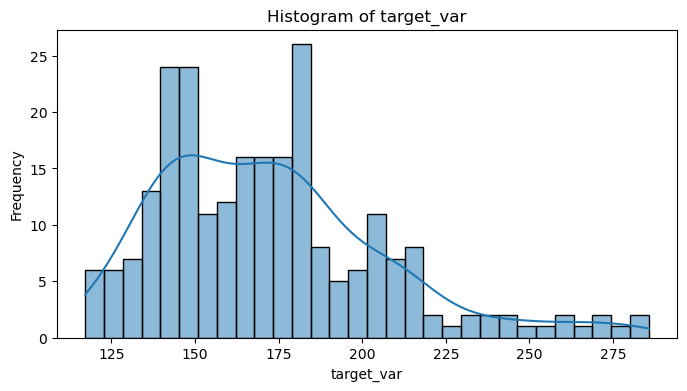

In [12]:
numeric_features = ['housing_units', 'consumer_sentiment', 'ppi_building', 'mortgage_rate', 'ppi_trans', 'newly_owned_houses', 'working_age_pop', 'unemp_rate', 'pop_growth', 'gdp_data', 'target_var']

for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=merged_df, x=feature, bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [17]:
pd.pivot_table(df1 , index = 'cluster_labels' , aggfunc = 'mean')

,consumer_sentiment,gdp_data,housing_units,mortgage_rate,newly_owned_houses,pop_growth,ppi_building,ppi_trans,target_var,unemp_rate,working_age_pop
cluster_labels,,,,,,,,,,,
0,71.957317,16092.895695,132763.613821,8.278049,765.597561,0.798745,128.564634,119.221951,152.918561,8.278049,2.002320e+08
1,91.142353,18422.789922,138341.788235,4.757647,1287.294118,0.586012,156.923894,133.140706,204.082576,4.757647,2.054748e+08
2,88.586486,14660.535617,124686.103604,5.262162,1771.202703,0.925529,121.505405,121.875676,157.341932,5.262162,1.900622e+08


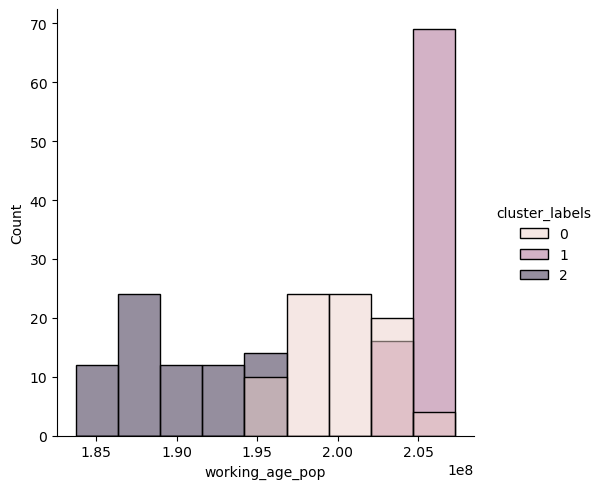

In [33]:
sns.displot(df1 , x = 'working_age_pop' , kind = 'hist' , hue = 'cluster_labels')

<Axes: xlabel='mortgage_rate', ylabel='target_var'>

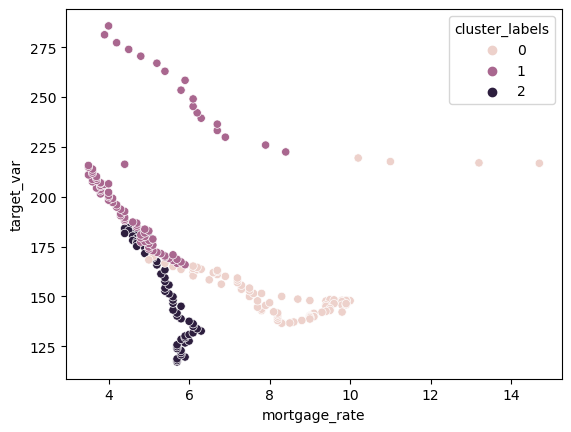

In [15]:
sns.scatterplot(df1 , x = 'mortgage_rate' , y = 'target_var' , hue = 'cluster_labels')

<Axes: xlabel='gdp_data', ylabel='target_var'>

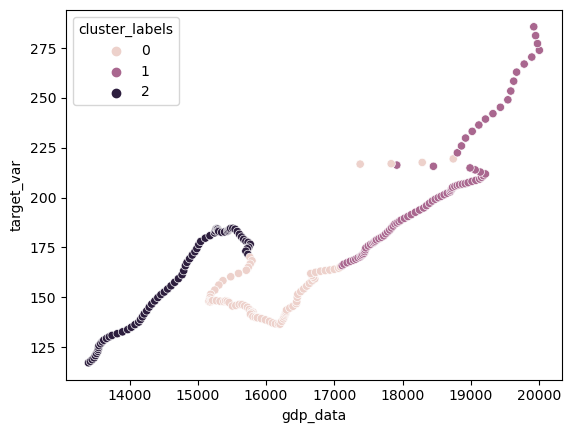

In [20]:
sns.scatterplot(df1 , x = 'gdp_data' , y = 'target_var' , hue = 'cluster_labels')

<Axes: xlabel='unemp_rate', ylabel='target_var'>

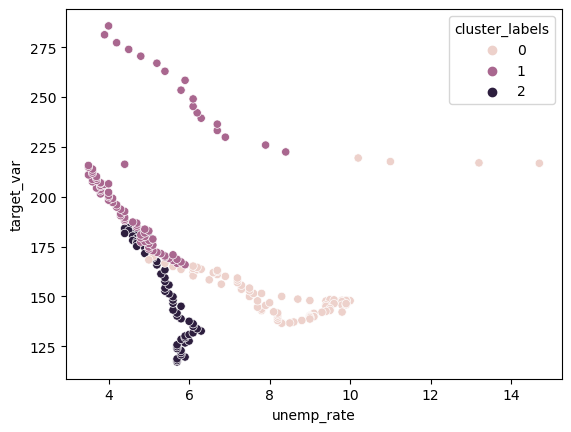

In [21]:
sns.scatterplot(df1 , x = 'unemp_rate' , y = 'target_var' , hue = 'cluster_labels')

<Axes: xlabel='housing_units', ylabel='target_var'>

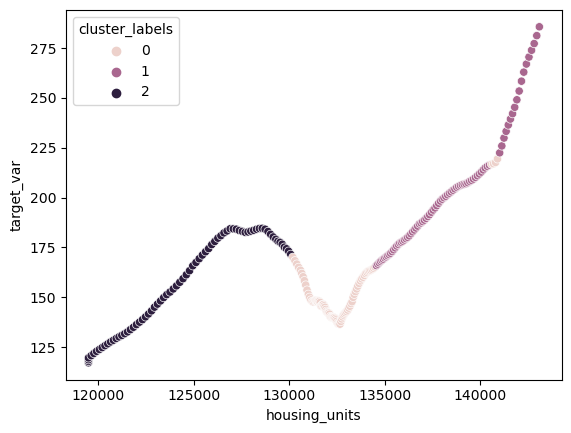

In [23]:
sns.scatterplot(df1 , x = 'housing_units' , y = 'target_var' , hue = 'cluster_labels')

<Axes: xlabel='consumer_sentiment', ylabel='target_var'>

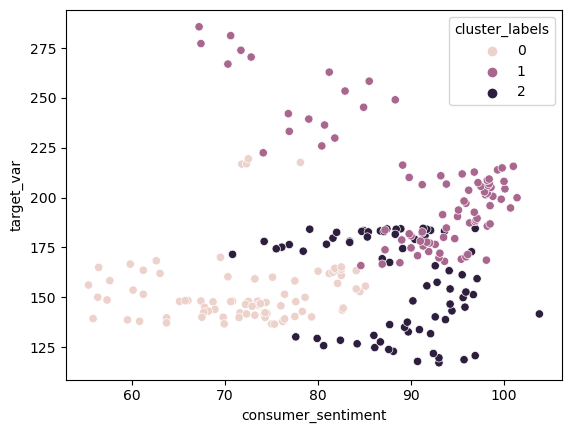

In [24]:
sns.scatterplot(df1 , x = 'consumer_sentiment' , y = 'target_var' , hue = 'cluster_labels')

<Axes: xlabel='ppi_building', ylabel='target_var'>

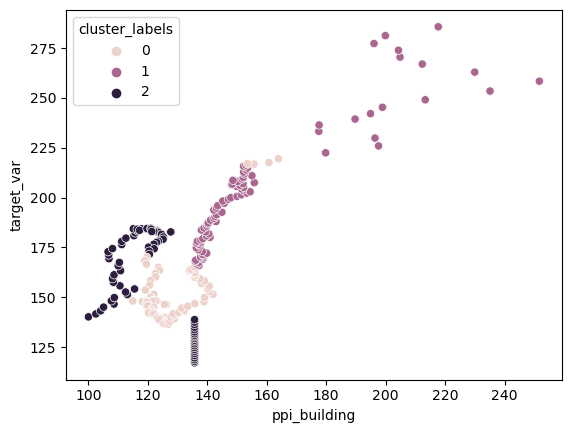

In [25]:
sns.scatterplot(df1 , x = 'ppi_building' , y = 'target_var' , hue = 'cluster_labels')

<Axes: xlabel='ppi_trans', ylabel='target_var'>

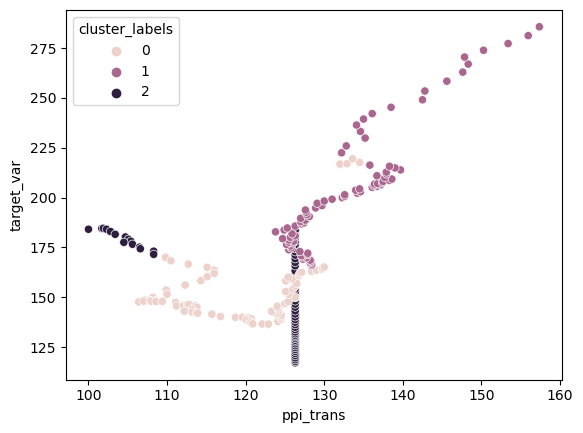

In [26]:
sns.scatterplot(df1 , x = 'ppi_trans' , y = 'target_var' , hue = 'cluster_labels')